# Data Exploration and Preperation - autoscout24 project


In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Preliminary settings
# Set the path to the working directory. 
path = r"C:\Users\Anwender\Desktop\Autoscout24_project"
os.chdir(path)

# settings for plots
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

## Data Cleaning

In [3]:
# Load the data
df = pd.read_csv('autoscout24.csv')
df.head()

,mileage,marke,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [4]:
# Remove null values or missing values
df = df.dropna().reset_index(drop=True)

In [5]:
# test is there are null values in the dataframe

def check_for_null_values(df):
    """
    description:
        Check for null values in the DataFrame
    
    args:
        df (DataFrame): DataFrame to be checked
    
    output:
        str: prints a list with columns containing null values
    """
    null_columns = df.columns[df.isnull().any()].tolist()
    return null_columns

null_columns = check_for_null_values(df)

if null_columns:
    print("Columns with null values:", null_columns)
else:
    print("There are no columns with null values in the DataFrame.")

There are no columns with null values in the DataFrame.


In [6]:
# Check data types of columns
column_types = df.dtypes
# Print the data types
print(column_types)

mileage        int64
marke         object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object


In [7]:
# Convert the values in the hp-column to int
df['hp'] = df['hp'].astype(int)

# Convert mileage in km to mileage in 1000km
df['mileage'] = df['mileage'] / 1000
# convert price in € to price in 1000€
df['price'] = df['price'] / 1000

In [8]:
def remove_outliers(df):
    """
    description: 
        removing potential implausible values and/or outliers
    
    args:
        df (DataFrame): DataFrame to be cleaned
    
    output:
        df (DataFrame): cleaned DataFrame.
    """
    
    df = df[(df['mileage'] < 2000)]                         # removing cars that ran more than 2.000.000 miles
    df = df[(df['price'] > 1) & (df['price'] < 3000)]       # setting price-range between 100€ and 3.000.000€
    df = df[(df['hp'] > 1) & (df['hp'] < 3000)]             # setting the range for horsepower between 1hp and 3000hp
    
    return df

df = remove_outliers(df)
df.describe()
    

,mileage,price,hp,year
count,46070.000000,46070.000000,46070.000000,46070.000000
mean,71.231058,16.563362,132.995529,2016.012242
std,62.453214,19.279743,75.072985,3.155534
min,0.000000,1.100000,5.000000,2011.000000
25%,19.900000,7.490000,86.000000,2013.000000
50%,60.000000,11.000000,116.000000,2016.000000
75%,105.000000,19.490000,150.000000,2019.000000
max,1111.111000,1199.900000,850.000000,2021.000000


# Exploratory Analysis

The results and plots will be saved for later use in the streamlit-app for the presentation

In [18]:
# average price per car
avg_price = df['price'].mean()
print(avg_price)

# total sales
total_sales = df['price'].sum()
print(total_sales)

16.56336247015411
763074.1089999999


In [9]:
# What car brands are in the data
brands_df = df["marke"].value_counts()
# Convert the series to a DataFrame
brands_df = brands_df.reset_index()
brands_df.columns = ['Brand', 'Count']

# Save brand data for later use in the streamlit-app
brands_df.to_csv('brands_df.csv', index=False)

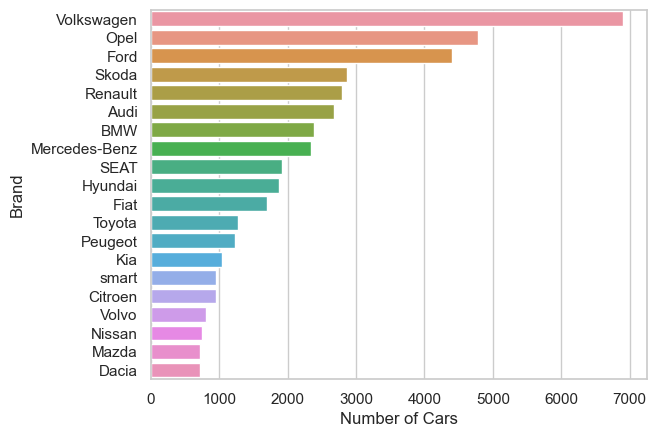

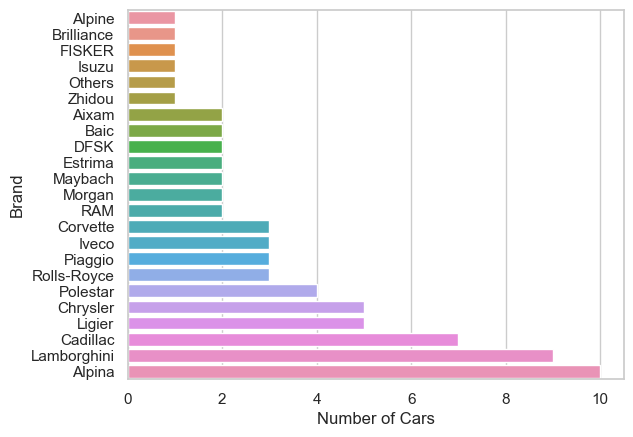

In [10]:
# Visualize top and bottom selling brands

top_brands = df.groupby('marke').size().nlargest(20).reset_index(name='count')
bottom_brands = df.groupby('marke').size().nsmallest(23).reset_index(name='count')

# Plot top and bottom selling brands and save the image
for title, data in [("Top Selling Brands", top_brands), ("Least Selling Brands", bottom_brands)]:
    sns.barplot(x='count', y='marke', data=data, errorbar=None)
    plt.xlabel('Number of Cars')
    plt.ylabel('Brand')
    plt.savefig(f"{title.replace(' ', '_').lower()}_plot.png", dpi=600, bbox_inches='tight')
    plt.show()

C:\Users\Anwender\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


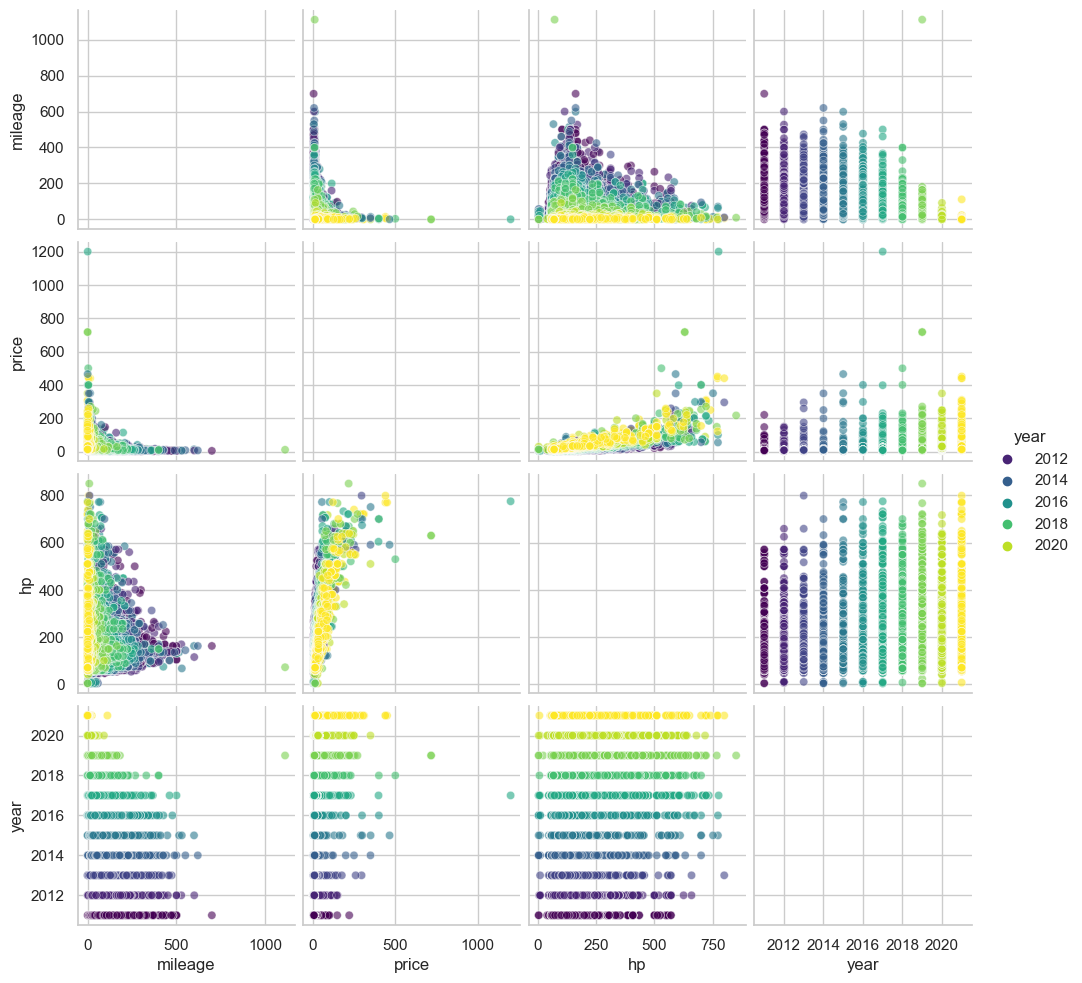

In [11]:
# Scatterplots of numerical features
numeric_features = df[["mileage", "price", "hp", "year"]]

# Create scatterplots
g = sns.pairplot(df, vars=numeric_features, hue="year", diag_kind='None', palette='viridis', plot_kws={'alpha': 0.6})

# Adjust x-axis ticks for the last column
for ax in g.axes[:, -1]:
    ax.set_xticks([2012, 2014, 2016, 2018, 2020])  # Set desired tick positions
    ax.set_xticklabels([2012, 2014, 2016, 2018, 2020])  # Set desired tick labels

plt.savefig("scatterplots", dpi=600, bbox_inches='tight')
plt.show()

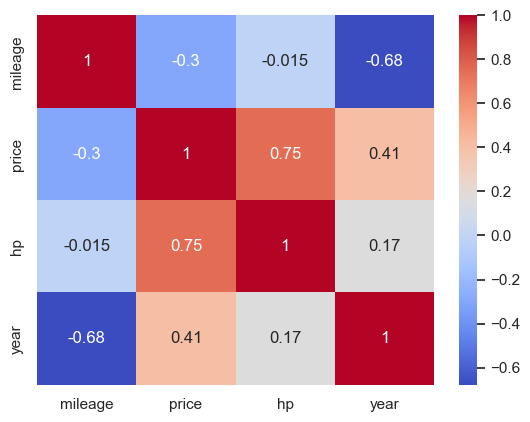

In [12]:
# correlation matrix for numerical features (heatmap)
corr_matrix = numeric_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig("correlations", dpi=600, bbox_inches='tight')
plt.show()

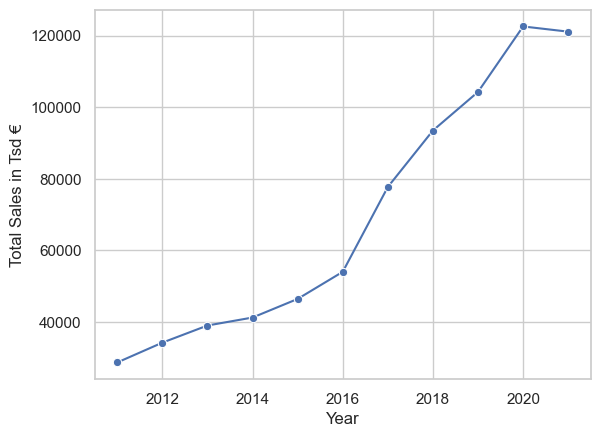

In [13]:
# Total Sales over the years
sales_per_year = df.groupby('year')['price'].sum().reset_index()
sns.lineplot(x='year', y='price', data=sales_per_year, marker='o')
#plt.title('Car Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales in Tsd €')
plt.savefig("total_sales_over_the_years", dpi=600, bbox_inches='tight')
plt.show()

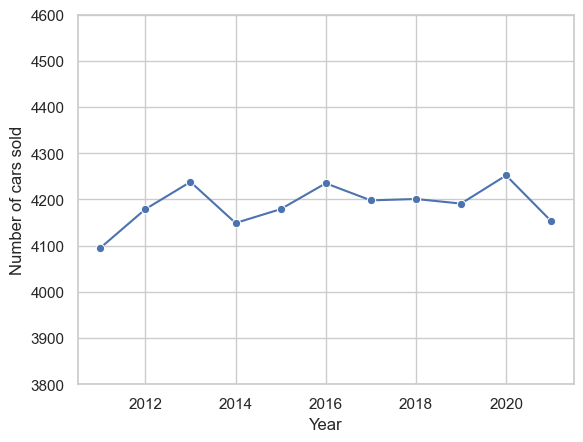

In [14]:
# Numer of Sales over the years
quant_per_year = df.groupby('year').size().reset_index(name='cars_sold')
sns.lineplot(x='year', y='cars_sold', data=quant_per_year, marker='o')
#plt.title('Quantity Of Cars Sold Per Year')
plt.xlabel('Year')
plt.ylabel('Number of cars sold')
plt.yticks(range(3800, 4700, 100))
plt.savefig("number_of_sales_over_the_years", dpi=600, bbox_inches='tight')
plt.show()

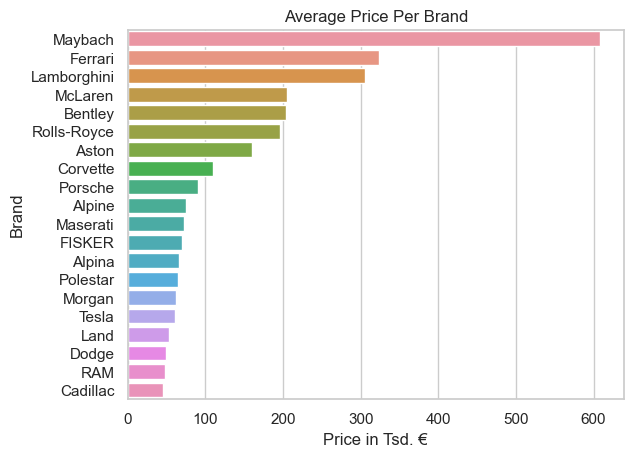

In [15]:
# Avg. price for each brand
avg_price_per_brand = df.groupby(['marke'])['price'].mean()

# average price per brand (top 20)
top_brands = df.groupby(['marke'])['price'].mean().nlargest(20).index
df_top_brands = df[df['marke'].isin(top_brands)]
sns.barplot(x='price', y='marke', data=df_top_brands, errorbar=None, order=top_brands)
plt.title('Average Price Per Brand')
plt.xlabel('Price in Tsd. €')
plt.ylabel('Brand')
plt.savefig("top_20_brands_avg_price", dpi=600, bbox_inches='tight')
plt.show()

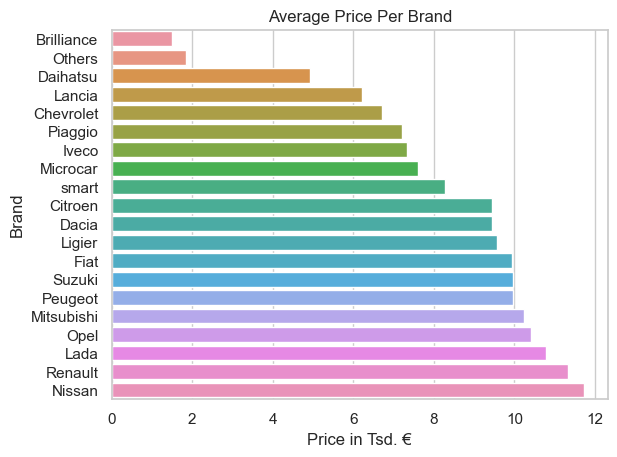

In [19]:
# average price per brand (bottom 20)
bottom_brands = df.groupby(['marke'])['price'].mean().nsmallest(20).index
df_bottom_brands = df[df['marke'].isin(bottom_brands)]
sns.barplot(x='price', y='marke', data=df_bottom_brands, errorbar=None, order=bottom_brands)
plt.title('Average Price Per Brand')
plt.xlabel('Price in Tsd. €')
plt.ylabel('Brand')
plt.savefig("bottom_20_brands_avg_price", dpi=600, bbox_inches='tight')
plt.show()

# Data Preperation


In [31]:
df.head()

,mileage,marke,model,fuel,gear,offerType,price,hp,year
0,235.0,BMW,316,Diesel,Manual,Used,6.800,116,2011
1,92.8,Volkswagen,Golf,Gasoline,Manual,Used,6.877,122,2011
2,149.3,SEAT,Exeo,Gasoline,Manual,Used,6.900,160,2011
3,96.2,Renault,Megane,Gasoline,Manual,Used,6.950,110,2011
4,156.0,Peugeot,308,Gasoline,Manual,Used,6.950,156,2011


In [32]:
print(df.columns.tolist())

['mileage', 'marke', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp', 'year']


In [27]:
# Define a function to recode dummy variables
def recode_dummy(df, col_name):
    """
    Recodes boolean dummy variables in a DataFrame to 0 and 1.
    
    Args:
    - df (DataFrame): The DataFrame containing the dummy variable column.
    - col_name (str): The name of the dummy variable column to be recoded.
    
    Returns:
    - df (DataFrame): The DataFrame with the dummy variable column recoded to 0 and 1.
    """
    df[col_name] = df[col_name].replace({False: 0, True: 1})
    return df

# Define a function to perform one-hot encoding and recode dummy variables for the categorical features
def one_hot_encode_and_recode(df, col_names):
    """
    Performs one-hot encoding and recodes dummy variables for multiple columns in a DataFrame.
    
    Args:
    - df (DataFrame): The DataFrame containing the columns to be one-hot encoded and recoded.
    - col_names (list of str): A list of column names to be one-hot encoded and recoded.
    
    Returns:
    - df (DataFrame): The DataFrame with the specified columns one-hot encoded and recoded.
    """
    for col_name in col_names:
        # Perform one-hot encoding
        one_hot_encoded_df = pd.get_dummies(df[col_name], prefix=col_name, drop_first=True)
        
        # Apply the dummy recode function
        for col in one_hot_encoded_df.columns:
            one_hot_encoded_df = recode_dummy(one_hot_encoded_df, col)
        
        # Concatenate the one-hot encoded DataFrame onto the original DataFrame
        df = pd.concat([df, one_hot_encoded_df], axis=1)
    
    return df

# Categorical features
col_names_cat = ['marke', 'model', 'fuel', 'gear', 'offerType', 'year']

df_cleaned = one_hot_encode_and_recode(df, col_names_cat)
df_cleaned.head()

# Save the data for later use
df_cleaned.to_csv('cleaned_data.csv')


In [28]:
df_cleaned.tail()

,mileage,marke,model,fuel,gear,offerType,price,hp,year,marke_Aixam,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
46066,0.099,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12.99,71,2021,0,...,0,0,0,0,0,0,0,0,0,1
46067,0.099,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12.99,71,2021,0,...,0,0,0,0,0,0,0,0,0,1
46068,0.099,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12.99,71,2021,0,...,0,0,0,0,0,0,0,0,0,1
46069,0.099,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12.99,71,2021,0,...,0,0,0,0,0,0,0,0,0,1
46070,0.099,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12.99,71,2021,0,...,0,0,0,0,0,0,0,0,0,1
